<a href="https://colab.research.google.com/github/aaryans-tech-conclave/Breast-Cancer-Neural-Network/blob/main/Breast_Cancer_Classification_using_Neural_Networks_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Breast Cancer Classification with a simple Neural Network (NN)**##

In this process we would employ Neural Networks to work on Numerical Data

##**Importing the Dependencies**##

Data used here could also be found at: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

##**Data Collection & Processing**##

In [2]:
#Loading the data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [3]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

Here our data labels a malignant datapoint as 0 and benign as 1

In [4]:
#Loading the data to a data frame
data_frame  = pd.DataFrame(breast_cancer_dataset.data,columns = breast_cancer_dataset.feature_names)

In [5]:
#Printing the first 5 rows of the dataframe
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
#Adding the 'Target' Column for our data frame
data_frame['label'] = breast_cancer_dataset.target

In [7]:
#Printing the Last 5 rows of the DataFrame
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


Here our column Label associates the Target Value (0->Malignant, 1->Benign) to each data point of the dataframe

##**Basic Analysis of the DataFrame**##

In [8]:
#Number of rows and columns of the DataFrame
data_frame.shape

(569, 31)

In [9]:
#Getting Basic statistical analysis of the Dataframe
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
#Checking for missing value
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [11]:
#Statistical Measures about the data
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [12]:
#checking the distribution of Target Variable
data_frame['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

0 -> Malignant

1 -> Benign

In [13]:
data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


##**Separating Features and Target**##

In [14]:
X = data_frame.drop(columns = 'label', axis = 1)
Y = data_frame['label']

In [15]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [16]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


##**Splitting Data into Training Data and Test Data**##

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 2)

Random state is for reproducibility of results, if the value assigned to it is the same.

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


##**Standardize the Data**##

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [30]:
print(X_train_std)

[[-0.01330339  1.7757658  -0.01491962 ... -0.13236958 -1.08014517
  -0.03527943]
 [-0.8448276  -0.6284278  -0.87702746 ... -1.11552632 -0.85773964
  -0.72098905]
 [ 1.44755936  0.71180168  1.47428816 ...  0.87583964  0.4967602
   0.46321706]
 ...
 [-0.46608541 -1.49375484 -0.53234924 ... -1.32388956 -1.02997851
  -0.75145272]
 [-0.50025764 -1.62161319 -0.527814   ... -0.0987626   0.35796577
  -0.43906159]
 [ 0.96060511  1.21181916  1.00427242 ...  0.8956983  -1.23064515
   0.50697397]]


##Building the Neural Network##

The Neural Network contains various layers, the first being the input layer (where the data is input), the final layer being the output layer (where predictions will be made), and there exist multiple intermediate layers (called Hidden Layers) which help in the decision making process.

We will use libraries: tenserflow and Keras for making the Neural Network.

In [19]:
#Importing tensorflow and Keras
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

Since establishing a Neural Network requires setting a set of weights some given random values, since different runnings of the program would re-adjust the values of the weights causing differing accuracy, we fix this allotment by using ```tf.random.set_seed(3)```to make reproducable results.

In [21]:
#Setting up the layers of the neural network
#flatten is the input layer, one middle layer, and one output layer

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (30,)),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(2, activation = 'sigmoid')
])

In [25]:
#compiling the Neural Network

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

##**Training the Neural Network**##

In [26]:
#Training

history = model.fit(X_train, Y_train, validation_split = 0.1, epochs = 10)

Epoch 1/10
13/13 [==============================] - 1s 23ms/step - loss: 57.6145 - accuracy: 0.6308 - val_loss: 24.2069 - val_accuracy: 0.6522
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 15.6671 - accuracy: 0.3790 - val_loss: 15.2369 - val_accuracy: 0.3478
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 10.8622 - accuracy: 0.2812 - val_loss: 5.3763 - val_accuracy: 0.1087
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 5.7889 - accuracy: 0.2396 - val_loss: 4.6854 - val_accuracy: 0.3478
Epoch 5/10
13/13 [==============================] - 0s 6ms/step - loss: 4.2361 - accuracy: 0.3203 - val_loss: 2.1036 - val_accuracy: 0.2826
Epoch 6/10
13/13 [==============================] - 0s 5ms/step - loss: 2.6950 - accuracy: 0.3594 - val_loss: 1.1844 - val_accuracy: 0.5217
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 1.8688 - accuracy: 0.4523 - val_loss: 0.7856 - val_accuracy: 0.6957
Epoch 8/10
13/

After every Epoch the accuracy of the data increases and the Loss function value decreases.

Comparing it to the Logistic Regression Model we observe that the Neural Network Model accuracy of the data is lower compared to the former, the reason being that we haven't standardized the data, to correct which we need to standardscale the data, get them to similar ranges.

In [31]:
#After Standardization
history = model.fit(X_train_std, Y_train, validation_split = 0.1, epochs = 10)

Epoch 1/10
13/13 [==============================] - 1s 27ms/step - loss: 0.5593 - accuracy: 0.6846 - val_loss: 0.4098 - val_accuracy: 0.7174
Epoch 2/10
13/13 [==============================] - 0s 7ms/step - loss: 0.3160 - accuracy: 0.8509 - val_loss: 0.2251 - val_accuracy: 0.9783
Epoch 3/10
13/13 [==============================] - 0s 8ms/step - loss: 0.2058 - accuracy: 0.9242 - val_loss: 0.1601 - val_accuracy: 0.9783
Epoch 4/10
13/13 [==============================] - 0s 9ms/step - loss: 0.1605 - accuracy: 0.9487 - val_loss: 0.1295 - val_accuracy: 0.9783
Epoch 5/10
13/13 [==============================] - 0s 10ms/step - loss: 0.1332 - accuracy: 0.9584 - val_loss: 0.1118 - val_accuracy: 0.9783
Epoch 6/10
13/13 [==============================] - 0s 17ms/step - loss: 0.1162 - accuracy: 0.9658 - val_loss: 0.1010 - val_accuracy: 0.9783
Epoch 7/10
13/13 [==============================] - 0s 7ms/step - loss: 0.1043 - accuracy: 0.9682 - val_loss: 0.0934 - val_accuracy: 0.9783
Epoch 8/10
13/13 

After standardization of the data it is easy to observe that the model accuracy has increased significantly.

##**Visualizing Accuracy and Loss**##

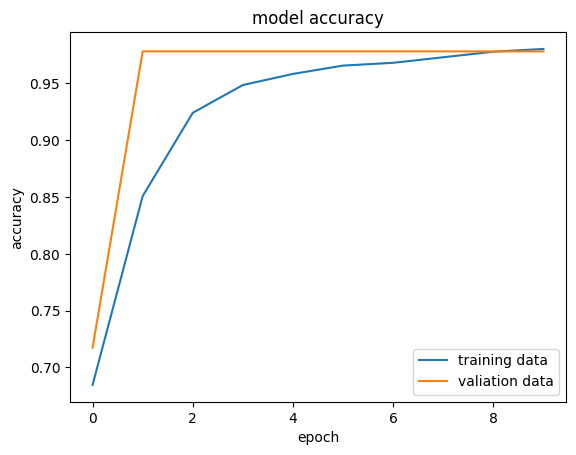

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data','valiation data'], loc = 'lower right')

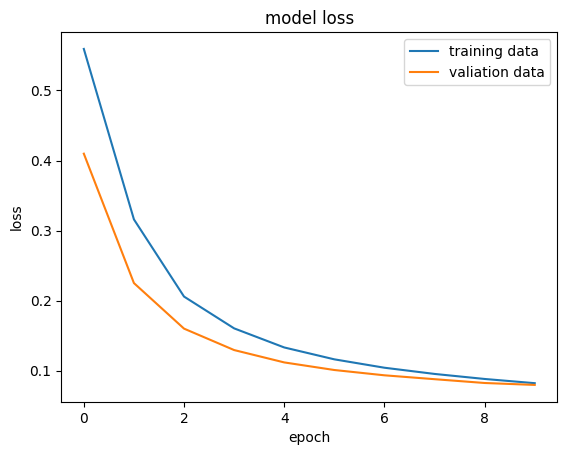

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data','valiation data'], loc = 'upper right')

##**Accuracy of the Model on Test Data**###

In [35]:
loss, accuracy = model.evaluate(X_test_std, Y_test)
print(accuracy)

4/4 [==============================] - 0s 4ms/step - loss: 0.0990 - accuracy: 0.9737
0.9736841917037964


The accuracy is around 0.973 or close to 97.3% which is high and can be made higher by increasing the number of epochs.

In [36]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [38]:
Y_pred = model.predict(X_test_std)

4/4 [==============================] - 0s 3ms/step


In [42]:
print(Y_pred.shape)
print(Y_pred[0])

(114, 2)
[0.4767209  0.73413754]


Note that the predicted value has two values reported rather than one for each input data point supplied to the model.

The values of the predicted value indicate the probabilities of value corresponding to the label of Malignant or Benign. Here after viewing the prediction of ```X_test_std[0]``` denoted as ```Y_pred[0]``` the number ```0.4767209``` denotes the probability that the the datapoint indicates Malignant (Label 0) and ```0.73413754``` is that of the datapoint indicating Benign (Label 1).

In [41]:
print(X_test_std)

[[-0.04462793 -1.41612656 -0.05903514 ... -0.18278004 -1.23064515
  -0.6268286 ]
 [ 0.24583601 -0.06219797  0.21802678 ...  0.54129749  0.11047691
   0.0483572 ]
 [-1.26115925 -0.29051645 -1.26499659 ... -1.35138617  0.269338
  -0.28231213]
 ...
 [ 0.72709489  0.45836817  0.75277276 ...  1.46701686  1.19909344
   0.65319961]
 [ 0.25437907  1.33054477  0.15659489 ... -1.29043534 -2.22561725
  -1.59557344]
 [ 0.84100232 -0.06676434  0.8929529  ...  2.15137705  0.35629355
   0.37459546]]


In [40]:
print(Y_pred)

[[0.4767209  0.73413754]
 [0.56302357 0.5175308 ]
 [0.07135418 0.987807  ]
 [0.9997012  0.01255364]
 [0.49759498 0.6351982 ]
 [0.98708355 0.10963283]
 [0.28757024 0.83704746]
 [0.07880257 0.98658663]
 [0.14742874 0.9603703 ]
 [0.18854162 0.94935447]
 [0.5462375  0.50799865]
 [0.20403083 0.8969976 ]
 [0.25682896 0.8577161 ]
 [0.28728172 0.8454774 ]
 [0.10151916 0.9647231 ]
 [0.89735436 0.2511624 ]
 [0.09055551 0.97569364]
 [0.09533647 0.9754871 ]
 [0.19532104 0.8771674 ]
 [0.9838242  0.07555389]
 [0.12419657 0.92473054]
 [0.09784755 0.9716071 ]
 [0.1593222  0.953498  ]
 [0.06659178 0.9892957 ]
 [0.21887574 0.85100794]
 [0.95701885 0.10363155]
 [0.21087019 0.8986891 ]
 [0.44281262 0.8251098 ]
 [0.8362232  0.19148047]
 [0.92663735 0.10115317]
 [0.36385345 0.893324  ]
 [0.12836301 0.96291804]
 [0.16095446 0.9582355 ]
 [0.9861561  0.03938749]
 [0.98460054 0.0537376 ]
 [0.20277432 0.9077501 ]
 [0.10070178 0.97657627]
 [0.2907948  0.84958386]
 [0.03824953 0.9906878 ]
 [0.08657996 0.98243964]


Since we would like to view the prediction with labels rather than their indicated probability we convert the prediction probability to class labels. We employ the argmax function for this:

In [43]:
#Argmax function

my_list = [10,20,30]

index_ofmax = np.argmax(my_list)
print(my_list)
print(index_ofmax)

[10, 20, 30]
2


The Argmax function returns the index of the maximum element of the given list.

In [44]:
#Converting the prediction probability to Class Labels, we create a for loop

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


We have now converted the data into easy to understand Labels

##**Building the Predictive System**##

Now we add some input data to see how our model performs:


1.  
```
857392    M    18.22    18.7    120.3    1033    0.1148    0.1485    0.1772    0.106    0.2092    0.0631    0.8337    1.593    4.877    98.81    0.003899    0.02961    0.02817    0.009222    0.02674    0.005126    20.6    24.13    135.1    1321    0.128    0.2297    0.2623    0.1325    0.3021    0.07987
```


2.   
```
858970    B    10.17    14.88    64.55    311.9    0.1134    0.08061    0.01084    0.0129    0.2743    0.0696    0.5158    1.441    3.312    34.62    0.007514    0.01099    0.007665    0.008193    0.04183    0.005953    11.02    17.45    69.86    368.6    0.1275    0.09866    0.02168    0.02579    0.3557    0.0802
```







In [45]:
input_data = (18.22,18.7,120.3,1033,0.1148,0.1485,0.1772,0.106,0.2092,0.0631,0.8337,1.593,4.877,98.81,0.003899,0.02961,0.02817,0.009222,0.02674,0.005126,20.6,24.13,135.1,1321,0.128,0.2297,0.2623,0.1325,0.3021,0.07987)

#Change the Input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#Reshape the Numpy Array since we are predicting for only one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#Standardizing the Input data
input_data_std = scaler.transform(input_data_reshaped)

#prediction
prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0]==0):
  print("Tumor is Malignant")
else:
  print("Tumor is Benign")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 124ms/step
[[0.8294488  0.24092749]]
[0]
Tumor is Malignant


Here, evidently the prediction has correctly mentioned that the Tumor is malignant.

In [46]:
input_data = (10.17,14.88,64.55,311.9,0.1134,0.08061,0.01084,0.0129,0.2743,0.0696,0.5158,1.441,3.312,34.62,0.007514,0.01099,0.007665,0.008193,0.04183,0.005953,11.02,17.45,69.86,368.6,0.1275,0.09866,0.02168,0.02579,0.3557,0.0802)


#Change the Input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#Reshape the Numpy Array since we are predicting for only one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#Standardizing the Input data
input_data_std = scaler.transform(input_data_reshaped)

#prediction
prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0]==0):
  print("Tumor is Malignant")
else:
  print("Tumor is Benign")

1/1 [==============================] - 0s 24ms/step
[[0.05104692 0.9784077 ]]
[1]
Tumor is Benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Here, evidently the prediction has correctly mentioned that the Tumor is Benign.